# Data Description

In order to better understand the nature of the data, we can try to cluster it into different groups, and see if any pattern emerges. To do this, we can apply several different algorithms, that may give us valuable insights over the data and the relations between the different entries.

We decided to try and use 3D clusters in order to try and relate more meaningful variables and, in turn, generate some more insightful plots.

To get started, we first handle all the necessary imports

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, AffinityPropagation, AgglomerativeClustering
from sklearn.mixture import GaussianMixture, BayesianGaussianMixture
from mpl_toolkits.mplot3d import Axes3D

# To display the plots properly
%matplotlib inline

Now we can load the prepared data used for training the different models and see the different features it has, so that we can choose some. We can also select the features we want to cluster together

In [2]:
data = pd.read_csv("../data/train.csv")

print(list(data))

['loan_id', 'loan_date', 'amount', 'payments', 'status', 'frequency', 'trans_count', 'credit_count', 'credit_ratio', 'withdrawal_count', 'withdrawal_ratio', 'smallest_transaction', 'biggest_transaction', 'daily_transactions_net', 'balance_min', 'balance_max', 'current_balance', 'times_negative_balance', 'credit_cash_ratio', 'collection_bank_ratio', 'interest_ratio', 'withdrawal_cash_ratio', 'remittance_bank_ratio', 'withdrawal_card_ratio', 'sanctions_rate', 'has_card', 'is_gold', 'gender', 'client_age', 'population', 'urban_ratio', 'average_salary', 'entrepreneur_rate', 'unemployment_rate_avg', 'crimes_rate_per_thousand', 'unemployment_growing', 'crimes_growing', 'can_afford_loan', 'can_pay_until', 'acc_age_when_loan']


From this list we can select 3 features that we want to check if they have interesting relations or not. We chose the average salary and client age to check if these demographics had any correlation with the remittance ratio present on the dataset

In [3]:
features = ["average_salary", "client_age", "remittance_bank_ratio"]

With the data loaded, we can pass it through several models, to try and obtain some correlations. We will first define some helper methods to make the calls easier

In [4]:
def show_results(predictions, features, title):
    fig = plt.figure()
    ax = plt.axes(projection ='3d')
    
    ax.scatter3D(
        data[features[0]], 
        data[features[1]],
        data[features[2]],
        c=predictions)
    
    ax.set_title(title)
    ax.set_xlabel(features[0])
    ax.set_ylabel(features[1])
    ax.set_zlabel(features[2])
    
    plt.show()

In [5]:
def apply_model(model, features):
    model.fit(data[features])
    predictions = model.predict(data[features])
    show_results(predictions, features, f"{model.__class__.__name__} - Results")

With all this defined, we can start using the cluster models

## K-Means Clustering

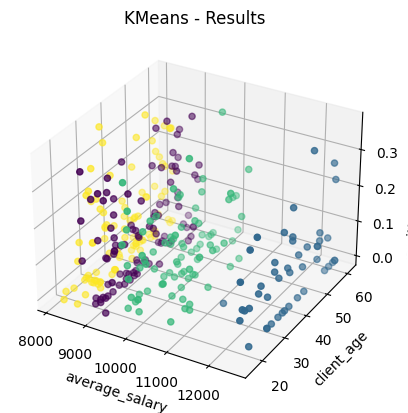

In [6]:
apply_model(KMeans(n_clusters=4), features=features)

## Affinity Propagation Clustering

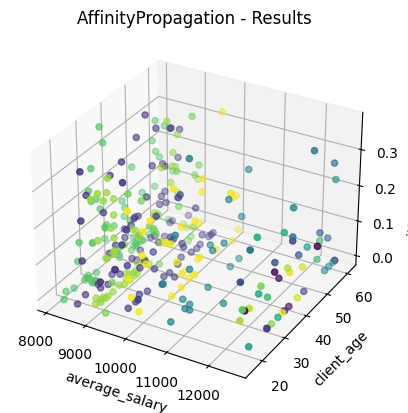

In [7]:
apply_model(AffinityPropagation(max_iter=600, damping=0.7), features=features)

## Gaussian Mixture Clustering

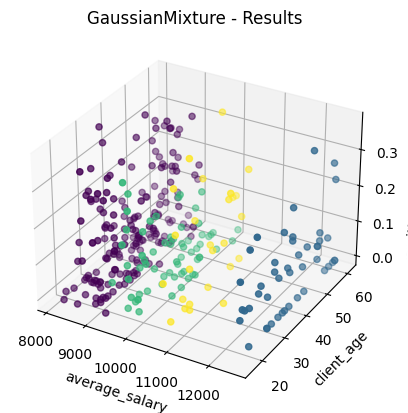

In [8]:
apply_model(GaussianMixture(n_components=4), features=features)

## Bayesian Gaussian Mixture

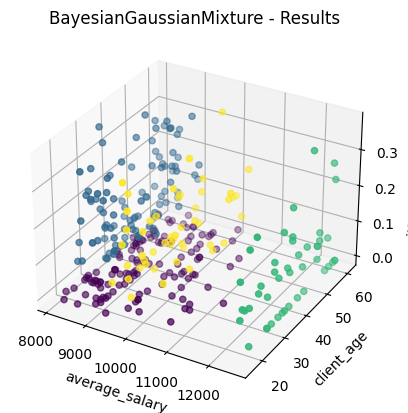

In [9]:
apply_model(BayesianGaussianMixture(n_components=4), features=features)

With these results we can see some patterns start emerging. From the Affinity Propagation Clustering, we cannot conclude much, and it is evident that it was not a good fit for this data distribution or problem, as it had its clusters scattered across the place.

Meanwhile, the results from K-Means and Gaussian Mixture seem to be nearly identical, and show some stratification regarding the age and salary, into 4 main categories (being especially salary biased), but make no real meaning of the remittance ratio, although they do indicate that some of the more wealthy individuals tend to have a lower remittance rate.

Finally, the Bayesian Gaussian Mixture, even though it was set to divide into 4 clusters, decided (apparently, correctly) that 3 components were necessary to divide the data truthfully. And, of all the distributions, it appears to be the one that gives the best insight, as it seems to show that the cluster with the lower salary has more entries with high remittance ratio, the middle one has a bit less, and the higher salary entries have the lowest remittance ratio of all.

Overall, almost all of the clusters can give some insight onto the data, but taking advantage of the power of the Bayesian Gaussian Mixture proved to lead to more insight than the other methods, making it the most suitable method for this particular problem instance.